In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.sparse as sparse
import scipy.stats as stats

#from umap import UMAP
import functools as ft
import multiprocessing as mp
import itertools as it
from numba import jit
from scipy import io

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor
from copy import copy

### Subset data

In [ ]:
subset = X[y == 1]

svm = OneClassSVM()
svm.fit(subset)


In [4]:
day_label_enum = {'D0': 0, 'D0.5': .5,
    'D1': 1, 'D1.5': 1.5,
    'D10': 10, 'D10.5': 10.5,
    'D11': 11, 'D11.5': 11.5,
    'D12': 12, 'D12.5': 12.5,
    'D13': 13, 'D13.5': 13.5,
    'D14': 14, 'D14.5': 14.5,
    'D15': 15, 'D15.5': 15.5,
    'D16': 16, 'D16.5': 16.5,
    'D17': 17, 'D17.5': 17.5,
    'D18': 18, 'D2': 2,
    'D2.5': 2.5, 'D3': 3,
    'D3.5': 3.5, 'D4': 4,
    'D4.5': 4.5, 'D5': 5,
    'D5.5': 5.5, 'D6': 6,
    'D6.5': 6.5, 'D7': 7,
    'D7.5': 7.5, 'D8': 8, 
    'D8.25': 8.25, 'D8.5': 8.5,
    'D8.75': 8.75, 'D9': 9,
    'D9.5': 9.5, 'DiPSC_2i_C1': -1,
    'DiPSC_2i_C2': -2, 'DiPSC_serum_C1': -3,
    'DiPSC_serum_C2': -4
}

In [6]:
# save to csv
scrna_small = pd.read_csv('./series2_small.csv.gz', compression='gzip', index_col=0).T

In [ ]:
# scrna_small = scrna_small.T 

In [7]:
#scrna_small = scrna_small.set_index(scrna_small.columns[0])
scrna_small.head()

,D0_Dox_C1_AAAGATGCAATCACAC-1,D0_Dox_C1_AAAGATGGTTGAGGTG-1,D0_Dox_C1_AACACGTCACCAACCG-1,D0_Dox_C1_AACACGTTCTTTAGTC-1,D0_Dox_C1_AACCATGAGCCTATGT-1,D0_Dox_C1_AACCATGCAGGACGTA-1,D0_Dox_C1_AACCGCGAGCCCGAAA-1,D0_Dox_C1_AAGCCGCCATTCGACA-1,D0_Dox_C1_AAGGAGCGTCATATGC-1,D0_Dox_C1_AAGGTTCCAAGTAATG-1,...,DiPSC_serum_C2_TTGACTTAGTGGGCTA-1,DiPSC_serum_C2_TTGACTTCACCGTTGG-1,DiPSC_serum_C2_TTGACTTGTTGAACTC-1,DiPSC_serum_C2_TTGGAACAGGAGCGTT-1,DiPSC_serum_C2_TTTATGCTCTGCGACG-1,DiPSC_serum_C2_TTTATGCTCTGTCCGT-1,DiPSC_serum_C2_TTTCCTCTCCGCGCAA-1,DiPSC_serum_C2_TTTGCGCGTCGCTTCT-1,DiPSC_serum_C2_TTTGGTTCAGCGTCCA-1,DiPSC_serum_C2_TTTGTCAAGAAACCTA-1
"('Xkr4',)",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"('Sox17',)",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
"('Mrpl15',)",0.0,0.0,1.444172,0.000000,0.510932,1.184756,0.0,0.510346,0.0,0.0,...,1.384198,0.0,1.641556,0.793421,0.510186,1.332619,0.0,1.925116,0.602111,2.028890
"('Lypla1',)",0.0,0.0,0.962858,1.044494,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.691750,0.0,0.870344,1.533170,0.000000,0.000000,0.0,0.000000,0.000000,1.060331
"('Gm37988',)",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [ ]:
# scrna_small = None
X = sparse.coo_matrix(scrna_small.values)

In [8]:
non_ipsc = [x for x in scrna_small.columns if 'ipsc' not in x.lower()]
len(non_ipsc)

23672

In [9]:
u = UMAP(n_neighbors=20, min_dist=.2)
cell_coords = u.fit_transform(raw_dat)

NameError: name 'UMAP' is not defined

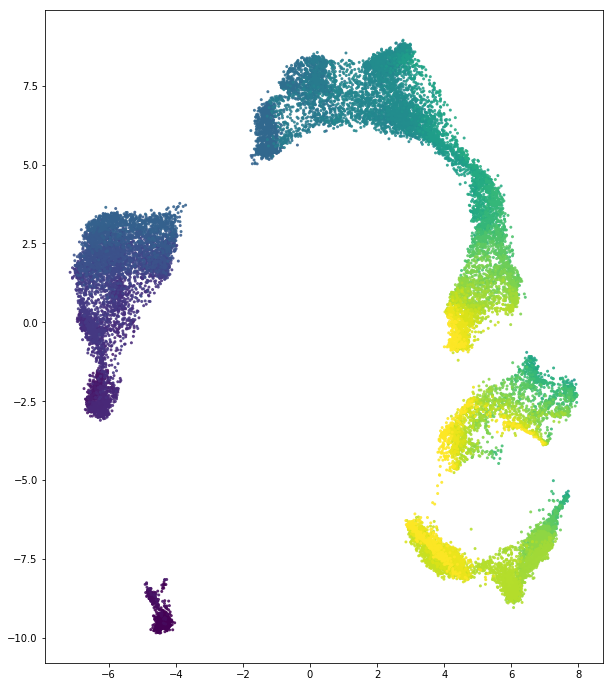

In [51]:
fig, ax = plt.subplots(figsize=(10,12))

ax.scatter(cell_coords[:,0], cell_coords[:,1], c=[day_label_enum[x] for x in subset_cell_days], vmin=0, alpha=.8, s = 4)
plt.show()